In [1]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql import SparkSession 
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
conf = SparkConf().setAppName("DataVisualization").setMaster("local")
sc = SparkSession.builder.config("spark.driver.host", "localhost") \
.config ("spark.sql.execution.arrow.enabled", "true").getOrCreate()
#.config ("spark.sql.shuffle.partitions", "50") \
#.config("spark.driver.maxResultSize","5g") \


# Read Credit Card Info from DB to a Data Frame
df_loan=sc.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="lakshmi",\
                                     url="jdbc:mysql://localhost:3306/creditcard_capstone",\
                                     dbtable="creditcard_capstone.CDW_SAPP_loan_application").load()

df_loan.show()

+--------------+------------------+--------------+----------+---------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+---------+------+------+-------+-------------+-------------+
|      LP001953|                 Y|             1|         1| Graduate|  Male|medium|    Yes|    Semiurban|           No|
|      LP001002|                 Y|             1|         0| Graduate|  Male|medium|     No|        Urban|           No|
|      LP001520|                 Y|             1|         0| Graduate|  Male|medium|    Yes|    Semiurban|           No|
|      LP001744|                 Y|             1|         0| Graduate|  Male|   low|     No|    Semiurban|           No|
|      LP002448|                 N|             0|         0| Graduate|  Male|   low|    Yes|        Rural|           No|
|      LP001954|        

C:\Spark\python\pyspark\sql\pandas\conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


<AxesSubplot:>

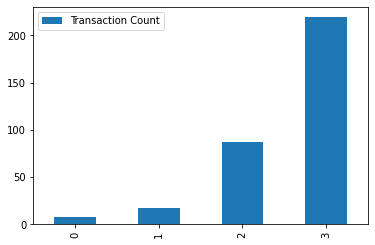

In [7]:
df_loan_pd= df_loan.filter(df_loan.Married == 'Yes') \
        .groupBy('Gender', 'Application_Status') \
        .agg(count('Application_ID').alias('Transaction Count')) \
        .sort('Transaction Count') \
        .toPandas()

df_loan_pd.plot(kind="bar", stacked=True)
